In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
depth= pd.read_csv(r'/home/data3/WZ/X101SC23084783-Z01-J009/01.RawData/a_70/depth',names='chr pos depth'.split(' '),sep='\t')

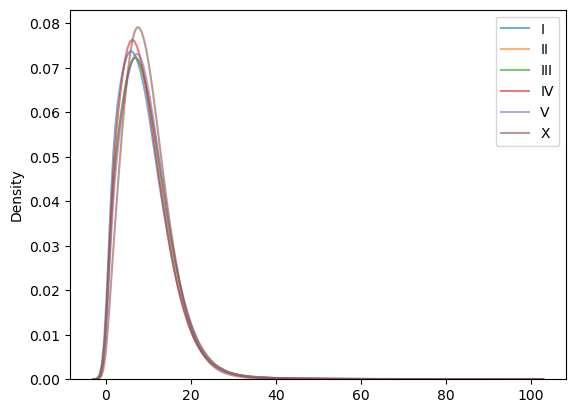

In [3]:
dp = depth[depth['chr']=='I']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label='I',alpha=0.6,bw_adjust=4)
dp= depth[depth['chr']=='II']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label='II',alpha=0.6,bw_adjust=4)
depth_f = depth[depth['chr']=='III']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label='III',alpha=0.6,bw_adjust=4)
dp = depth[depth['chr']=='IV']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label='IV',alpha=0.6,bw_adjust=4)
dp = depth[depth['chr']=='V']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label='V',alpha=0.6,bw_adjust=4)
dp = depth[depth['chr']=='X']['depth'].to_list()
dp_real = []
for i in range(len(dp)):
    if dp[i] <= 100:
        dp_real.append(dp[i])
sns.kdeplot(dp_real,label = 'X',alpha=0.6,bw_adjust=4)
plt.legend()
plt.savefig('/home/data3/WZ/X101SC23084783-Z01-J009/01.RawData/a_70/depth.svg',dpi=300)

In [ ]:
import math
plt.figure(figsize=(50,30))
plt.subplot(6,1,1)
dp = depth[depth['chr']=='I']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('I',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.subplot(6,1,2)
dp = depth[depth['chr']=='II']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('II',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.subplot(6,1,3)
dp = depth[depth['chr']=='III']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('III',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.subplot(6,1,4)
dp = depth[depth['chr']=='IV']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('IV',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.subplot(6,1,5)
dp = depth[depth['chr']=='V']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('V',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.subplot(6,1,6)
dp = depth[depth['chr']=='X']['depth'].to_list()
dp_lg = [math.log2(n) if n > 0 else 0 for n in dp]
plt.scatter(list(range(1,len(dp_lg)+1)),dp_lg,s=0.1,c='darksalmon')
plt.ylabel('X',fontsize=60)
plt.yticks([0,2,4,10],[0,2,4,10],fontsize=30)
plt.savefig('/home/data3/WZ/X101SC23084783-Z01-J009/01.RawData/a_70/chrom_coverage_total.svg',dpi=300)

In [ ]:
import re
def md_match(md_strings):
    # mdlen = len(md_strings)
    mat_times = 0
    num_re = r"([0-9]+)"
    mis_num_re = r"([A-Z]+|\^[A-Z]+)*([0-9]+)*"
    
    while True:
        re_str = num_re + mis_num_re * int(mat_times)
        re_md = re.compile(re_str)
        re_str_lst = re_md.match(md_strings).groups()
        if not re_str_lst[-1]: 
            break
        mat_times += 1
    re_str_lst = [n for n in re_str_lst if n != None]
    return re_str_lst

In [ ]:
with open('/home/data3/WZ/X101SC23084783-Z01-J009/01.RawData/a_70/out.dup.sam','r') as f:
    sam = f.readlines()

In [ ]:
import re


class Alignment(object):
    def __init__(self):
        self.error = ''
        self.line = ''
        self.qname = ''
        self.flag = -1
        self.rname = ''
        self.pos = -1
        self.cigar = ''
        self.seq = ''
        self.qual = []
        self.tag_md = []
        self.point_mutation = []

    def process(self, read: str):
        self.line = read
        # note that we don't verified each field because we trust the aligner and user
        fields = read.split('\t')
        if len(fields) < 11:
            self.error = 'less than 11 fields'
            return False
        self.qname = fields[0]
        self.flag = int(fields[1])
        self.rname = fields[2]
        self.pos = int(fields[3])
        self.cigar = fields[5]
        self.seq = fields[9]
        self.qual = [ord(c) - 33 for c in fields[10]]

        optionRe = re.compile(r'^([A-Za-z][A-Za-z0-9]):[AifZHB]:([!-~]+)$')
        mdTagRe = re.compile(r'[0-9]+|\^[A-Z]+|[A-Z]+')
        for opt in fields[11:]:
            match = optionRe.search(opt)
            if match and match[1] == 'MD':
                self.tag_md = mdTagRe.findall(match[2])
                return True
        else:
            self.error = 'not find MD field'
            return False

    def call_point_mutation(self):
        if len(self.tag_md) == 1:
            assert self.tag_md[0].isdecimal()
            return

        norm_seq = []
        norm_qual = []
        seq_ptr = 0
        cigarRe = re.compile(r'\d+[MIDSHNPX=]')
        cg = list(map(lambda c: (int(c[:-1]), c[-1]), cigarRe.findall(self.cigar)))
        for num, op in cg:
            if op == 'M' or op == '=' or op == 'X':
                norm_seq.extend(self.seq[seq_ptr: seq_ptr + num])
                norm_qual.extend(self.qual[seq_ptr: seq_ptr + num])
                seq_ptr += num
            elif op == 'I' or op == 'S':
                seq_ptr += num
            elif op == 'D' or op == 'N':
                norm_seq.extend(['-'] * num)
                norm_qual.extend([99] * num)

        rel_pos = 0
        for md in self.tag_md:
            if md.isdigit():
                rel_pos += int(md)
            elif md[0] == '^':
                rel_pos += len(md) - 1
            else:
                mod_nt = norm_seq[rel_pos]
                read_qual = norm_qual[rel_pos]
                orig_nt = md
                rel_pos += 1
                self.point_mutation.append((rel_pos, orig_nt, mod_nt, read_qual))


def pm_tracer(file):
    with open(file, 'rt') as f:
        for lno, line in enumerate(f):
            line = line.strip()
            if line == '' or line[0] == '@':
                continue
            alignment = Alignment()
            if not alignment.process(line):
                print(f'[line{lno}] {alignment.error}, skip...')
            else:
                alignment.call_point_mutation()
                yield alignment


In [ ]:
from tqdm import tqdm
pm = []
for i in tqdm(sam):
    if i[0] !='@':
        a = Alignment()
        a.process(i)
        if len(a.seq)>130:
            a.call_point_mutation()
            for i in a.point_mutation:
                if i[3] > 20:
                  pm.append(i[:3])

In [ ]:
AT_mut = [n for n in pm if n[1]=='A' and n[2] == 'T']
TA_mut = [n for n in pm if n[1]=='T' and n[2] == 'A']
AC_mut = [n for n in pm if n[1]=='A' and n[2] == 'C']
CA_mut = [n for n in pm if n[1]=='C' and n[2] == 'A']
AG_mut = [n for n in pm if n[1]=='A' and n[2] == 'G']
GA_mut = [n for n in pm if n[1]=='G' and n[2] == 'A']
TC_mut = [n for n in pm if n[1]=='T' and n[2] == 'C']
CT_mut = [n for n in pm if n[1]=='C' and n[2] == 'T']
TG_mut = [n for n in pm if n[1]=='T' and n[2] == 'G']
GT_mut = [n for n in pm if n[1]=='G' and n[2] == 'T']
CG_mut = [n for n in pm if n[1]=='C' and n[2] == 'G']
GC_mut = [n for n in pm if n[1]=='G' and n[2] == 'C']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def compare_plot(a,legend1,b,legend2):
    a_lst = [0]*150
    b_lst = [0]*150
    for i in tqdm(a):
        if i[0] - 1 <= 149:
            a_lst[i[0]-1] += 1
    for i in tqdm(b):
        if i[0] - 1 <= 149:
            b_lst[i[0]-1] += 1
    b_lst.reverse()
    plt.plot(a_lst,label=legend1)
    plt.plot(b_lst,label=legend2)
    plt.xlabel('position')
    plt.ylabel('count')
    plt.title('mutation along reads')
    plt.legend()
    plt.show()

In [ ]:
compare_plot(AG_mut,'A>G',TC_mut,'T>C')
plt.savefig('/home/data3/WZ/X101SC23084783-Z01-J009/01.RawData/a_70/mutation.jpg')

In [ ]:
import os
print(os.getcwd())

In [ ]:
compare_plot(AT_mut,'A>T',TA_mut,'T>A')

In [ ]:
compare_plot(AC_mut,'A>C',TG_mut,'T>G')

In [ ]:
compare_plot(GA_mut,'G>A',CT_mut,'C>T')

In [ ]:
compare_plot(GC_mut,'G>C',CG_mut,'C>G')

In [ ]:
compare_plot(GT_mut,'G>T',CA_mut,'C>A')